# Main Solar System N-body System Code

By Victor Cruz Ramos and Jose Rios-Fonseca

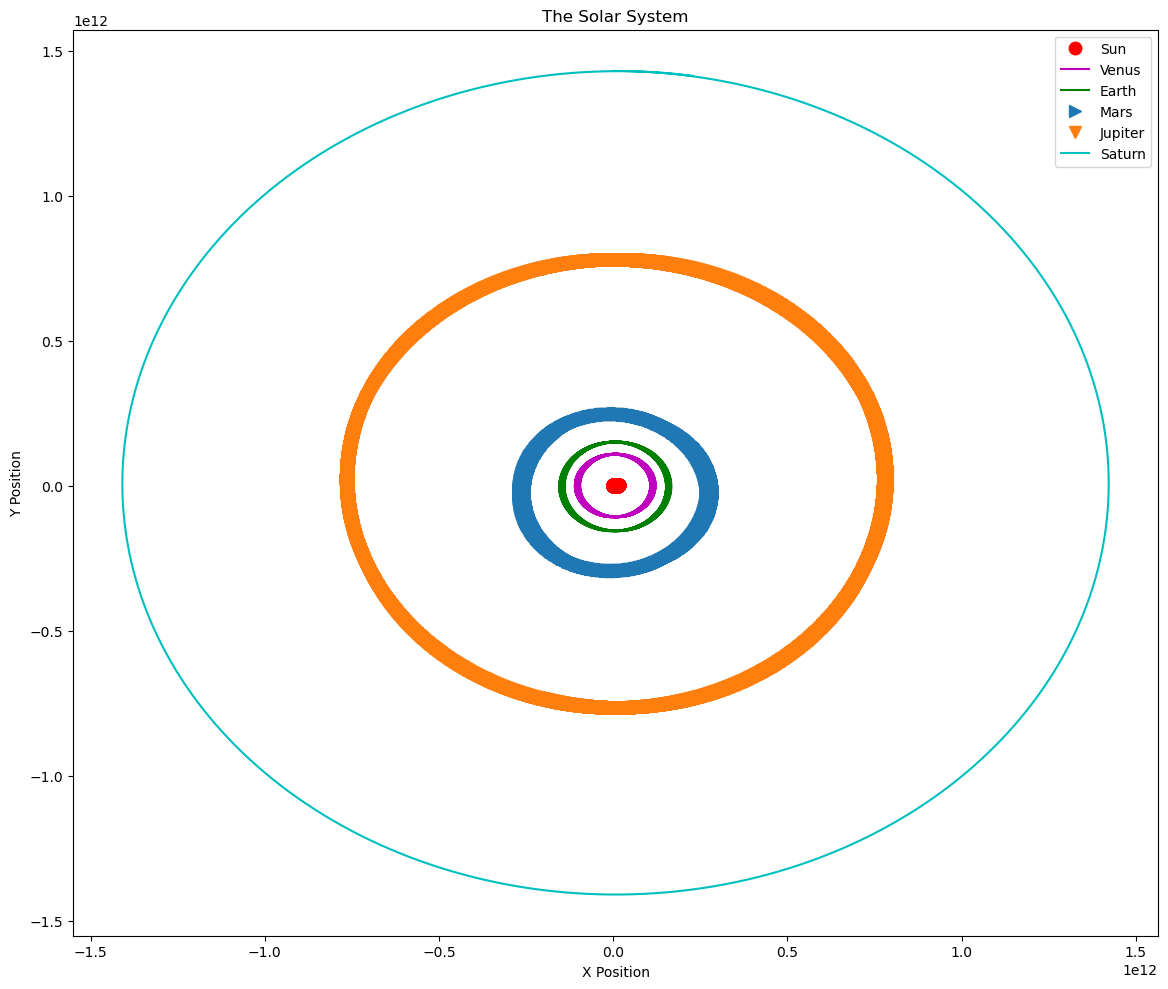

<Figure size 432x288 with 0 Axes>

In [37]:
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.constants as con
import math
from matplotlib.pyplot import figure
import scipy.optimize as fitter
import matplotlib.pyplot as plt

G = 6.674e-11

#class used to handle all of the vectorial information of our planets
class Vector:
    def __init__(self,x,y,z):
        self.x = x
        self.y = y
        self.z = z
        
#the class that defines an astrological object
class AstroBody:
    def __init__(self, mass, velocity, position, radius, energy, name = "",): 
        self.energy = energy
        self.name = name
        self.mass = mass
        self.velocity = velocity
        self.position = position
        self.radius = radius
        #self.energy = energy
        # we will use vector to give a position
        
   
        
        
 #define the accelertation based on gravitational force of planets on one another
def accelerationG(bodylist,n):
       #set acceleration to 0 for later accumulation
        acceleration = Vector(0,0,0)
        bodyn = bodylist[n]
        col = False 

        for i, other_body in enumerate(bodylist):
            #if col == True:
                #print('Collision caught')
                #break
                #return acceleration
            if i == n: #do not calculate self-attraction
                continue
            else:
                    r = (bodyn.position.x - other_body.position.x)**2+ (bodyn.position.y- other_body.position.y)**2+ (bodyn.position.z - other_body.position.z)**2
                    r = np.sqrt(r)
                    #if bodyn.name == 'Moon' and other_body.name == 'Sun':
                        #print(r)
                    #r > bodyn.radius + other_body.radius:
                    gField = G * other_body.mass * 1/r**3
                    acceleration.x += gField*(other_body.position.x - bodyn.position.x)
                    acceleration.y += gField*(other_body.position.y - bodyn.position.y)
                    acceleration.z += gField*(other_body.position.z - bodyn.position.z)
                    #else:
                        #print('collision')
                        #col = True
                    
        return acceleration
    
def approx_acc(blist, k, matrix):
    acc = Vector(0,0,0)
    planet = blist[k]
    sun = blist[0]
    planet_coords = matrix[k]
    sun_coords = matrix[0]
    for j in range(len(planet_coords[0])):
        r = ((planet_coords[0][j] - sun_coords[0][j])**2 + (planet_coords[1][j]- sun_coords[1][j])**2)
        r = np.sqrt(r)
        gField = G * sun.mass * 1/r**3
        acc.x += gField*(sun_coords[0][j] - planet_coords[0][j])
        acc.y += gField*(sun_coords[1][j] - planet_coords[1][j])
        
    return acc
    
    
    
def potential_energy (clist, coor_mat, n):
    pot = []
    body_n = clist[n]
    coor_n = coor_mat[n]
    for j in range(len(clist)):
        other_body = clist[j]
        if other_body is body_n:
            continue 
        else:
            coor_other = coor_mat[j]
            for k in range(len(coor_n[1])):
                r = (pow((coor_n[0][k] - coor_other[0][k]), 2)+ pow((coor_n[1][k]- coor_other[1][k]), 2)) #(body_n.position.z - other_body.position.z)**2
                r = np.sqrt(r)
                pot.append(-1*(G*other_body.mass*body_n.mass)/r)
    return pot                
        
def approx_potential(clist, n, matrix):
    pot = []
    bodyn = clist[n]
    sun = clist[0]
    coor_n = matrix[n]
    sun_coords = matrix[0]
    for k in range(len(coor_n[1])):
                r = (pow((coor_n[0][k] - sun_coords[0][k]), 2)+ pow((coor_n[1][k]- sun_coords[1][k]), 2)) 
                r = np.sqrt(r)
                pot.append(-1*(G*sun.mass*bodyn.mass)/r)
    return pot

#calculate velocity based on acceleration caused by the sum of forces from other planets
#no return since we update class atribute for velocity and info is stored there
def update_velocity(bodylist,dt):
    for i, bodyn in enumerate(bodylist):
        a = accelerationG(bodylist,i)
        bodyn.velocity.x += a.x * dt
        bodyn.velocity.y += a.y * dt
        bodyn.velocity.z += a.z * dt
        
def kinetic_energy(dt, blist, n, matrix):
    ke = []
    coor = matrix[n]
    bodyn = blist[n]
    a = approx_acc(blist, n, matrix)
    for j in range(len(coor[0])):
        bodyn.energy += 1/2*bodyn.mass*(a.x * dt)**2
        bodyn.energy += 1/2*bodyn.mass*(a.y * dt)**2
        bodyn.energy += 1/2*bodyn.mass*(a.z * dt)**2
        ke.append(bodyn.energy)
    return ke

        
#we obtain position by multiplying the velocity by time
#again there is no return since we update the position attribute of our class          
def update_position(bodylist,dt):
    for bodyn in bodylist:
        bodyn.position.x += bodyn.velocity.x * dt
        bodyn.position.y += bodyn.velocity.y * dt
        bodyn.position.z += bodyn.velocity.z * dt

#We define a function that encapsulates the entire kinematics of the system
#this further simplifies the calling of functions
def totalSystem(bodylist, dt):
    update_velocity(bodylist, dt)
    update_position(bodylist, dt)



#function used to obtain position values from objects for later graphing
def positionRecording(bodylist, dt, dts):
    N = len(bodylist)
    coor_matrix = [] 
    for i in range(N):
        coor_matrix.append([[],[],[]])

#start the simulation
    for j in range(dts): 
        totalSystem(bodylist, dt)
        for idx_0 in range(len(bodylist)):
            bodyn = bodylist[idx_0]
            coor_matrix[idx_0][0].append(bodyn.position.x)#extract position data from objects
            coor_matrix[idx_0][1].append(bodyn.position.y)
            coor_matrix[idx_0][2].append(bodyn.position.z)
            
    return coor_matrix

def system_plot (alist, matrix, styles): # the whole thing
    figure(figsize=(14, 12), dpi=100)
    for i in range(len(alist)):
        #matrix = positionRecording(alist, dt, dts)
        plt.plot(matrix[i][0], matrix[i][1], styles[i], markersize=9, label = alist[i].name)
    plt.xlabel('X Position')
    plt.ylabel('Y Position') 
    plt.title('The Solar System')
    plt.legend()
    plt.show()


sun = AstroBody(mass = 1.98e30,velocity = Vector(0,0,0),position = Vector(0,0,0),radius = 7e8, energy = 0,name = 'Sun')
earth = AstroBody(mass = 6e24,velocity = Vector(30000,0,0),position = Vector(0,1.5e11,0),radius = 6.371e6, energy = 0,name = 'Earth')
venus = AstroBody(mass = 4.87e24,velocity = Vector(35000,0,0),position = Vector(0,1.08e11,0),radius = 6.05e6, energy = 0, name = 'Venus')
jupiter = AstroBody(mass = 1.89e27,velocity = Vector(13000,0,0),position = Vector(0,7.78e11,0),radius = 70e7, energy = 0, name = 'Jupiter')
mars = AstroBody(mass = 7.35e22,velocity = Vector(24100,0,0),position = Vector(0,2.47e11,0),radius = 1.7371e6, energy = 0,name = 'Mars')
saturn = AstroBody(mass = 7.685e26,velocity = Vector(9600,0,0),position = Vector(0,1.43e12,0),radius = 5.8e7, energy = 0, name = 'Saturn')
blist = [sun, venus, earth, mars, jupiter, saturn]
styles = ['ro', 'm-', 'g-', '>', 'v', 'c-']

t_final = 31540000*30 #end time in seconds
dt = 100000 #step size in seconds
n_steps = int(t_final/dt)
matrix = positionRecording(blist, dt, dts = n_steps)



system_plot(blist, matrix, styles)
plt.savefig('Solar System Plot.png', bbox_inches='tight')

# sun_coords = matrix[0]
earth_coords = matrix[2]
# venus_coords = matrix[1]
# mars_coords = matrix[3]
# jupiter_coords = matrix[4]
# saturn_coords = matrix[5]


# plt.plot(earth_coords[0], earth_coords[1], 'b', label = 'Earth')
# plt.plot(sun_coords[0], sun_coords[1], 'ro', label = 'Sun')
# plt.plot(mars_coords[0], mars_coords[1], 'g', label = 'Mars')
# plt.plot(jupiter_coords[0], jupiter_coords[1], '>', label = 'Jupiter')
# plt.plot(saturn_coords[0], saturn_coords[1], 'c--', label = 'Saturn')
# plt.plot(venus_coords[0], venus_coords[1], 'v', label = 'Venus')
# plt.legend()
# plt.ylim(-1e11, 1e11)
# plt.xlim(-1e11, 1e11)
# plt.show()


# Attempt at plotting energy as function of time

-4.893263833777294e+37
9462
9462


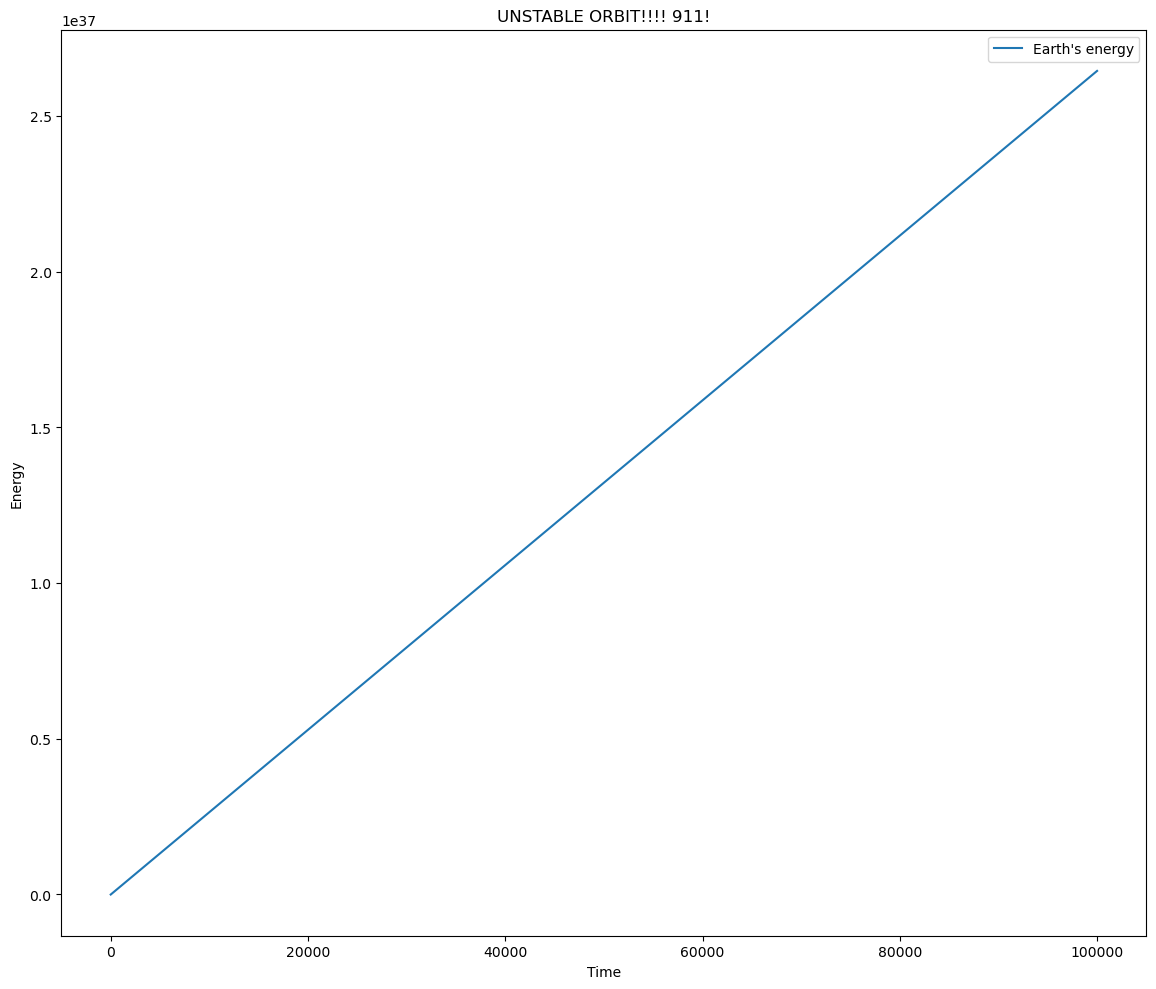

In [38]:
print(sum(potential_energy (blist, matrix, 2)))
print(len(earth_coords[0]))
print(len(approx_potential(blist, 2, matrix)))
def total_energy(dt, blist, matrix, n):
    pot = approx_potential(blist, n, matrix)
    ke = kinetic_energy(dt, blist, n, matrix)
    total = []
    for i in range(len(pot)):
        total.append(ke[i] + pot[i])
    return total
figure(figsize=(14, 12), dpi=100)
tot = total_energy(dt, blist, matrix, 2)
time = np.linspace(0, 100000, 9462)
plt.plot(time, tot, label = "Earth's energy")
plt.xlabel('Time')
plt.ylabel('Energy') 
plt.title('UNSTABLE ORBIT!!!! 911!')
plt.legend()
plt.show() 

# We attempted to plot the energies of Earth, but it obvious something is wrong. 

# Exploring Elliptical Orbits

In [39]:
def elliptical_orbit(a, e):
    theta = np.linspace(0, 2*np.pi, 100)
    vals = (a*(1-e**2))/(1+e*np.cos(theta))
    r_x = (vals*np.cos(theta))
    r_y = (vals*np.sin(theta))
    return r_x, r_y

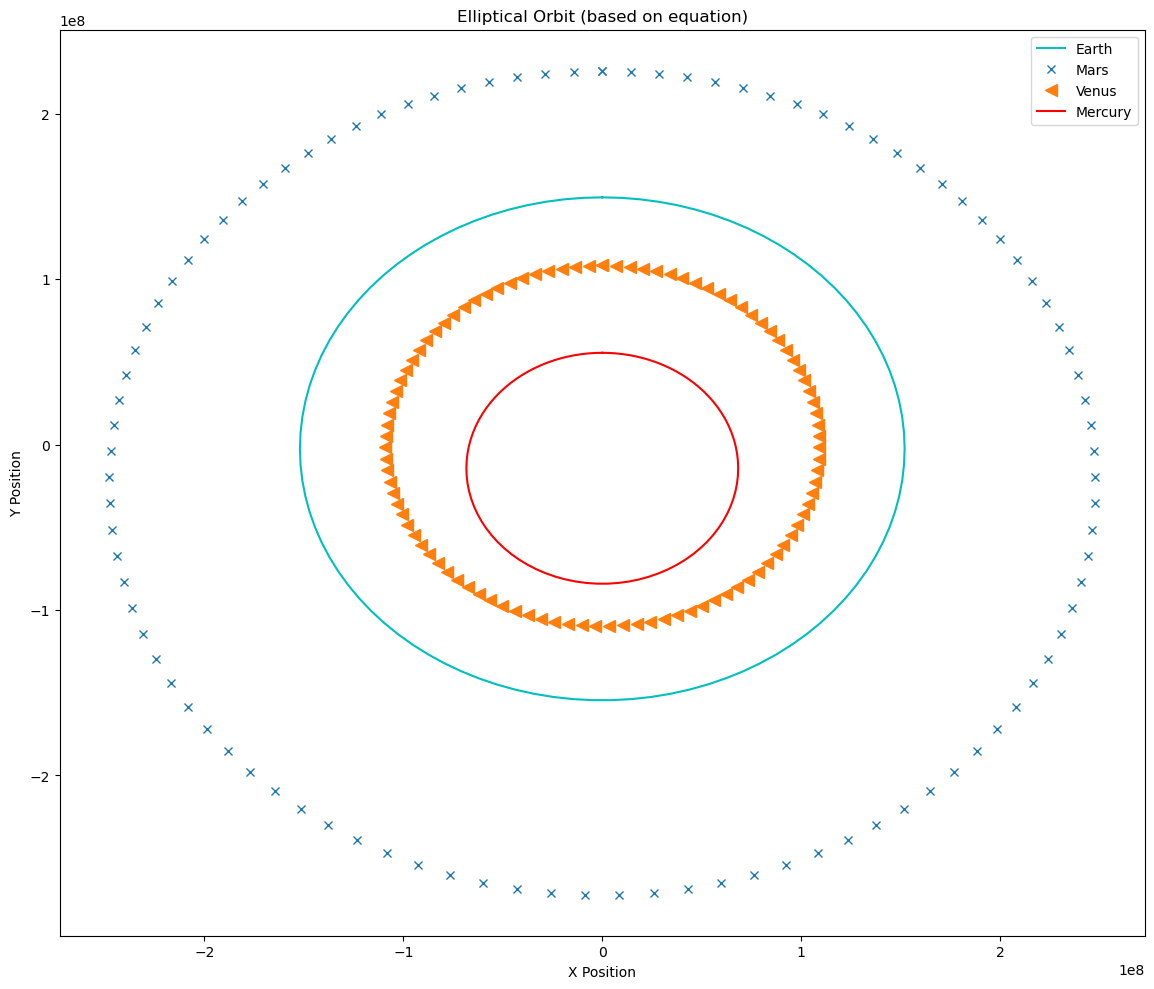

In [40]:
r_x_earth, r_y_earth = elliptical_orbit((1.52e8), .017) #earth
r_x_mars, r_y_mars = elliptical_orbit((2.49e8), 0.093) #mars
r_x_Venus, r_y_Venus = elliptical_orbit(1.09e8, 0.0068) #Venus
r_x_Mercury, r_y_Mercury = elliptical_orbit(6.98e7, 0.2056) #Mercury
r_x_jupiter, r_y_jupiter = elliptical_orbit((4.5e9), 0.048) #jupiter

figure(figsize=(14, 12), dpi=100)
plt.plot(r_y_earth, r_x_earth, 'c', label = "Earth")
#plt.ylim(-1.9e8, 1.9e8)
plt.plot(r_y_mars, r_x_mars, 'x' ,label = "Mars")
plt.plot(r_y_Venus, r_x_Venus, '<', markersize=9,label = "Venus")
plt.plot(r_y_Mercury, r_x_Mercury, 'r', markersize=9, label = "Mercury")
#plt.plot(r_y_jupiter, r_x_jupiter, '*', label = 'Jupiter')
#plt.xlim(-1e8, 1e8)
plt.title('Elliptical Orbit (based on equation)')
plt.xlabel('X Position')
plt.ylabel('Y Position') 
plt.legend()
plt.show()

# Binary Star System 

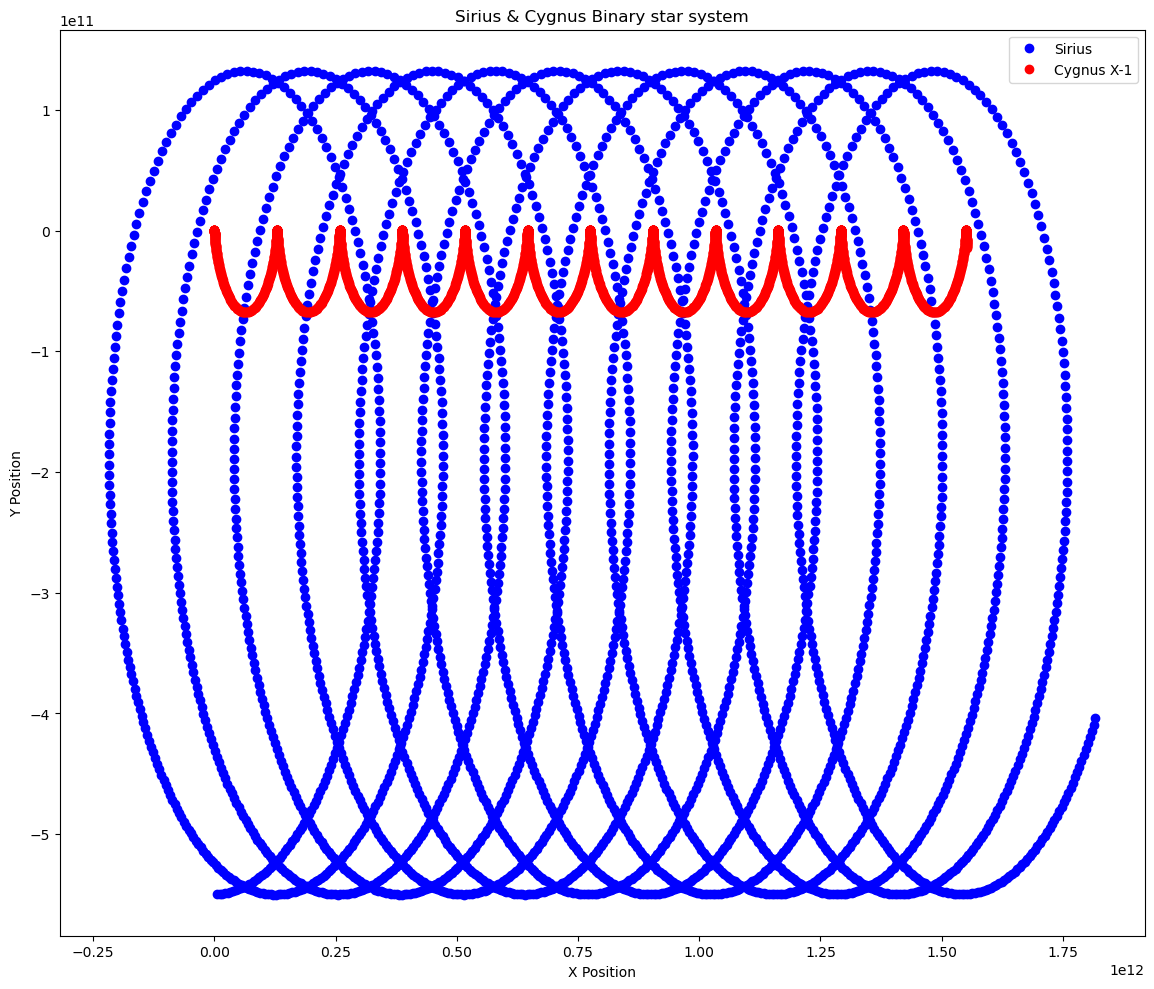

In [41]:
Sirius = AstroBody(mass = 4.26e30,velocity = Vector(5.5e4,0,0),position = Vector(0,-5.5e11,0),radius = 7e8, energy = 0, name = 'Sirius')
#Star = AstroBody(mass = 4.26e30,velocity = Vector(-1.5e4,0,0),position = Vector(0,5.5e11,0),radius = 7e8,name = 'Star')
Cygnus = AstroBody(mass = 4.26e31,velocity = Vector(0,0,0),position = Vector(0,5.5e8,0),radius = 15305400,energy = 0, name = 'Cygnus')
sun_list = [Sirius, Cygnus]
t_final = 315400000 #end time in seconds
dt = 100000
n_steps = int(t_final/dt)
matrix_2 = positionRecording(sun_list, dt, dts = n_steps)
sirius_coords = matrix_2[0]
cygnus_coords = matrix_2[1]
#star_coords = matrix_2[2]
figure(figsize=(14, 12), dpi=100)
plt.plot(sirius_coords[0], sirius_coords[1], 'bo', label = 'Sirius')
plt.plot(cygnus_coords[0], cygnus_coords[1], 'ro', label = "Cygnus X-1")
plt.title('Sirius & Cygnus Binary star system')
plt.xlabel('X Position')
plt.ylabel('Y Position') 
#plt.plot(star_coords[0], star_coords[1], 'g')
#plt.xlim(-1.5e13, 4.3e13)
#plt.ylim(1e10, 1e10)
plt.legend()
plt.show()

# Our take on Modeling Ellipitical Orbits 

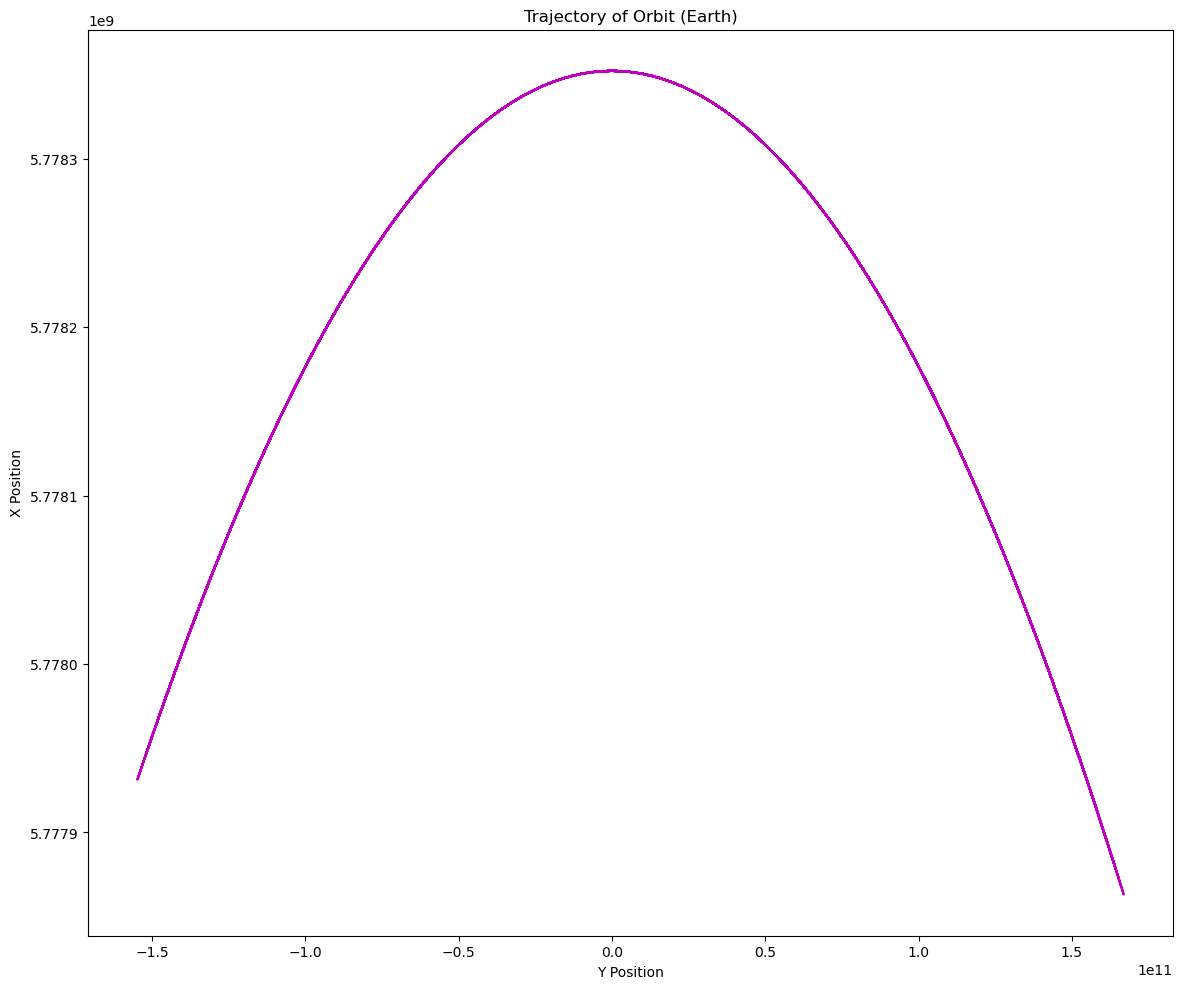

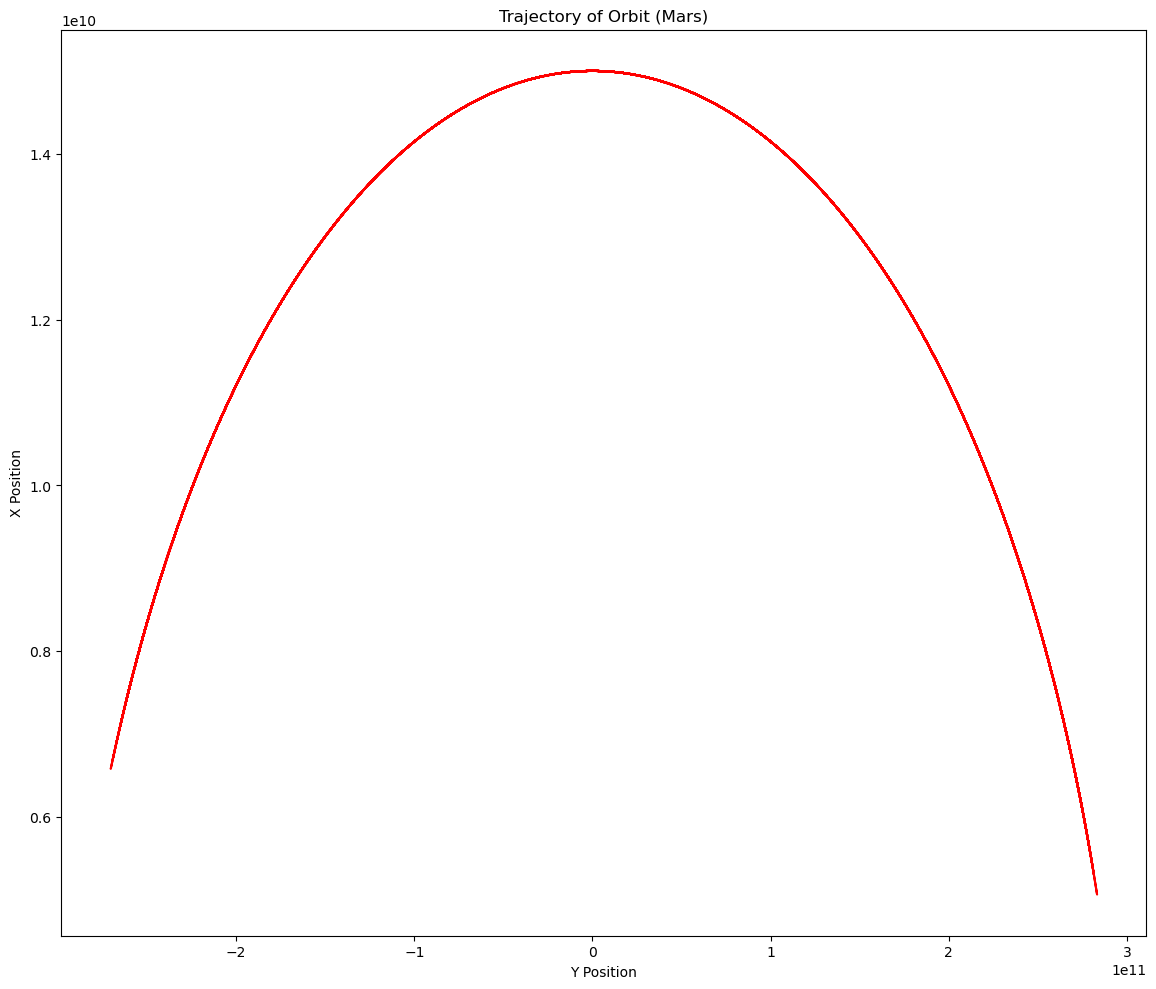

In [49]:
sun_coords = matrix[0]
earth_coords = matrix[2]
venus_coords = matrix[1]
mars_coords = matrix[3]
jupiter_coords = matrix[4]
saturn_coords = matrix[5]

figure(figsize=(14, 12), dpi=100)
def model_ellipse (x, a, b):
    return b/a*np.sqrt(a**2-(np.power(x, 2)))
par10 = [1.7e11, 1.8e11]
par, cov = fitter.curve_fit(model_ellipse, earth_coords[1], earth_coords[0], par10)
analytical = model_ellipse(earth_coords[0], par[0], par[1])
plt.plot(earth_coords[0], analytical, 'm')
plt.title('Trajectory of Orbit (Earth)')
plt.ylabel('X Position')
plt.xlabel('Y Position') 
plt.show()
#x**2/a**2 + y**2/b**2 = 1;  once parabola is flipped 90 deg a**2 becomes tip of parabola & b**2 is the cutoff
#'Eccentricity = sqrt(1-b**2/a**2)'
par12 = [2.98e11, 2.99e11]
figure(figsize=(14, 12), dpi=100)
par, cov = fitter.curve_fit(model_ellipse, mars_coords[1], mars_coords[0], par12)
analytical_2 = model_ellipse(mars_coords[0], par[0], par[1])
plt.plot(mars_coords[0], analytical_2, 'r')
plt.title('Trajectory of Orbit (Mars)')
plt.ylabel('X Position')
plt.xlabel('Y Position') 
plt.show()

<ipython-input-49-d63d419025ed>:10: RuntimeWarning: invalid value encountered in sqrt
  return b/a*np.sqrt(a**2-(np.power(x, 2)))
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


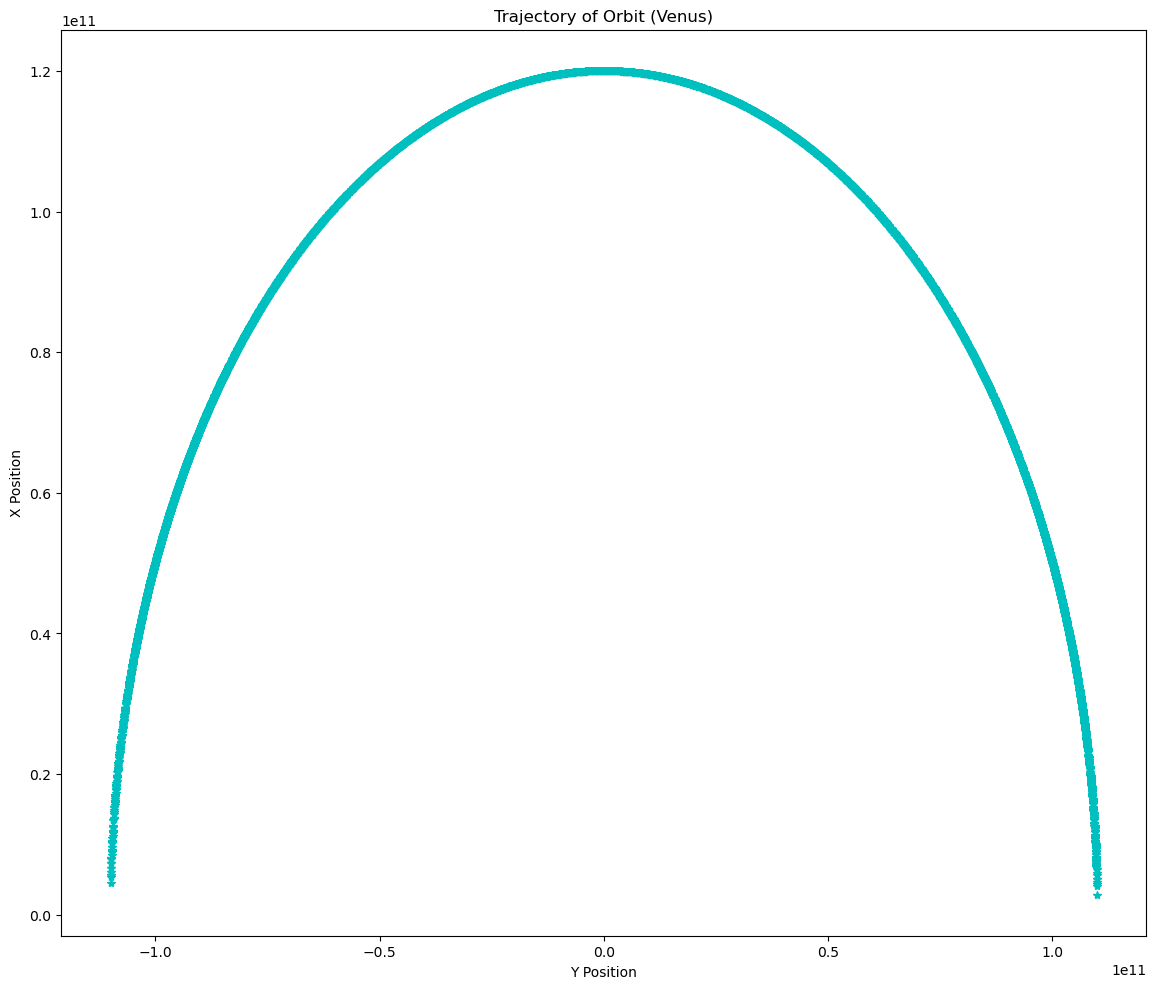

In [50]:
figure(figsize=(14, 12), dpi=100)
par11 = [1.1e11, 1.2e11]
par, cov = fitter.curve_fit(model_ellipse, venus_coords[1], venus_coords[0], par11)
analytical_3 = model_ellipse(venus_coords[0], par[0], par[1])
plt.title('Trajectory of Orbit (Venus)')
plt.plot(venus_coords[0], analytical_3, 'c*')
#plt.legend()
plt.ylabel('X Position')
plt.xlabel('Y Position') 
plt.show()

<ipython-input-49-d63d419025ed>:10: RuntimeWarning: invalid value encountered in sqrt
  return b/a*np.sqrt(a**2-(np.power(x, 2)))


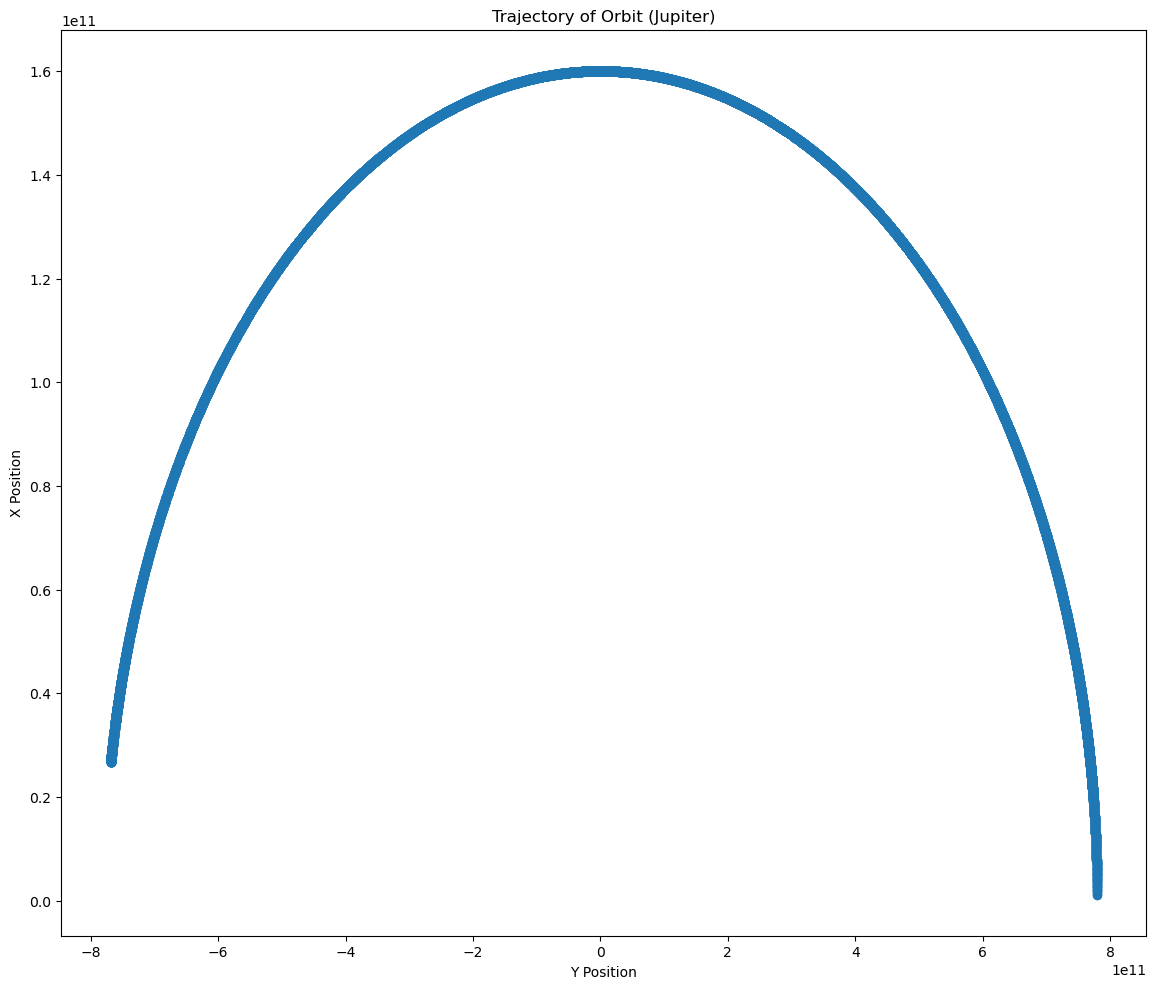

In [51]:
figure(figsize=(14, 12), dpi=100)
par13 = [8.4e11, 8.5e11]
par, cov = fitter.curve_fit(model_ellipse, jupiter_coords[1], jupiter_coords[0], par13)
analytical_4 = model_ellipse(jupiter_coords[0], par[0], par[1])
plt.plot(jupiter_coords[0], analytical_4, 'o')
plt.title('Trajectory of Orbit (Jupiter)')
plt.ylabel('X Position')
plt.xlabel('Y Position') 
plt.show()

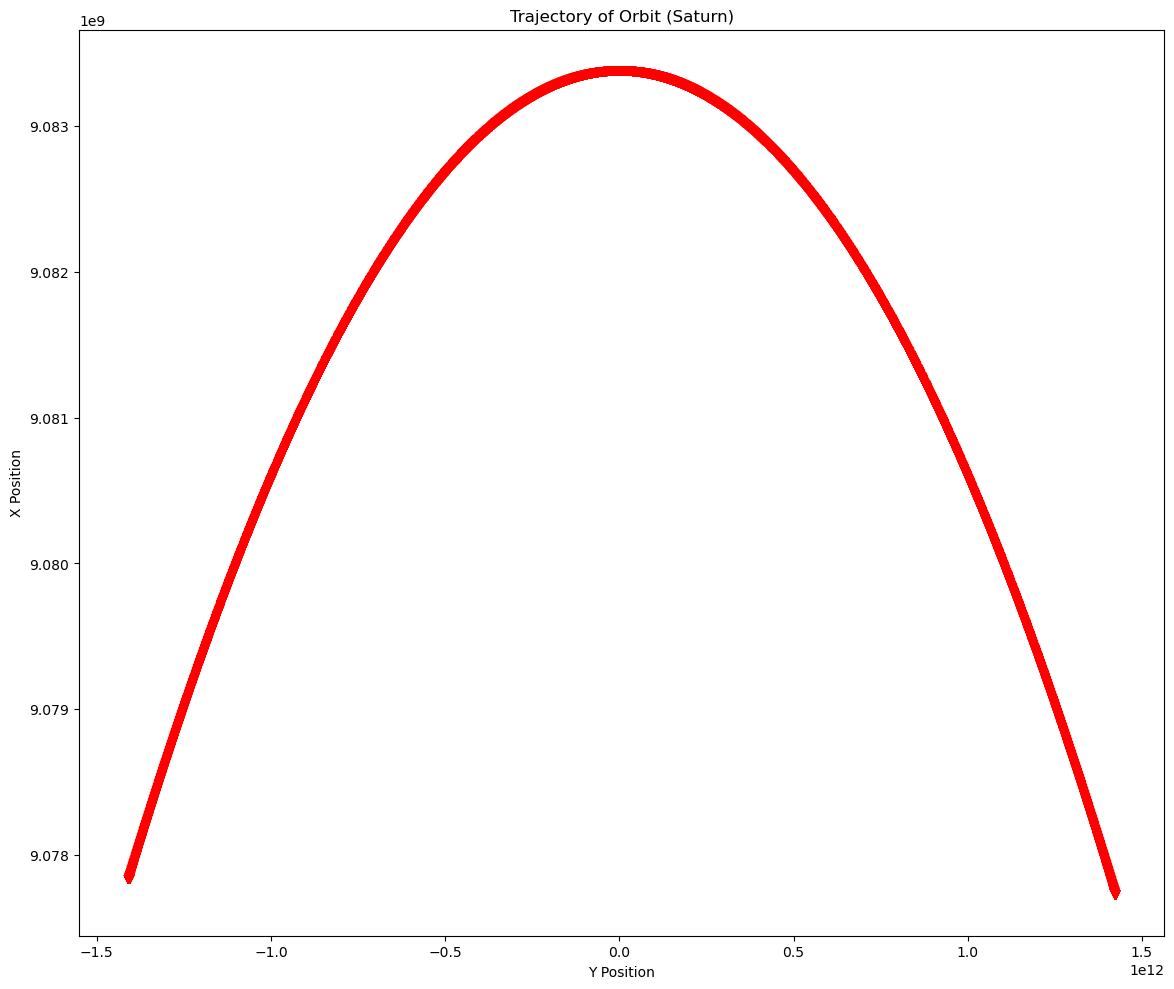

In [52]:
figure(figsize=(14, 12), dpi=100)
par14 = [1.7e12, 1.72e12]
par, cov = fitter.curve_fit(model_ellipse, saturn_coords[1], saturn_coords[0], par14)
analytical_5 = model_ellipse(saturn_coords[0], par[0], par[1])
plt.plot(saturn_coords[0], analytical_5, 'vr')
plt.title('Trajectory of Orbit (Saturn)')
plt.ylabel('X Position')
plt.xlabel('Y Position') 
plt.show()

# Attaining and Plotting our Eccentricity values vs the Actual Eccentricities

In [54]:
par10 = [1.7e11, 1.8e11]
xmax = max(earth_coords[0])
ymax = min(analytical)
def Eccentricity(a, b):
    val = np.sqrt(1-b**2/a**2)
    return val
Earth_ecc = Eccentricity(par10[1], par10[0])
Mars_ecc = Eccentricity(par12[1], par12[0])
Venus_ecc = Eccentricity(par11[1], par11[0])
Jupiter_ecc = Eccentricity(par13[1], par13[0])
Saturn_ecc = Eccentricity(par14[1], par14[0])

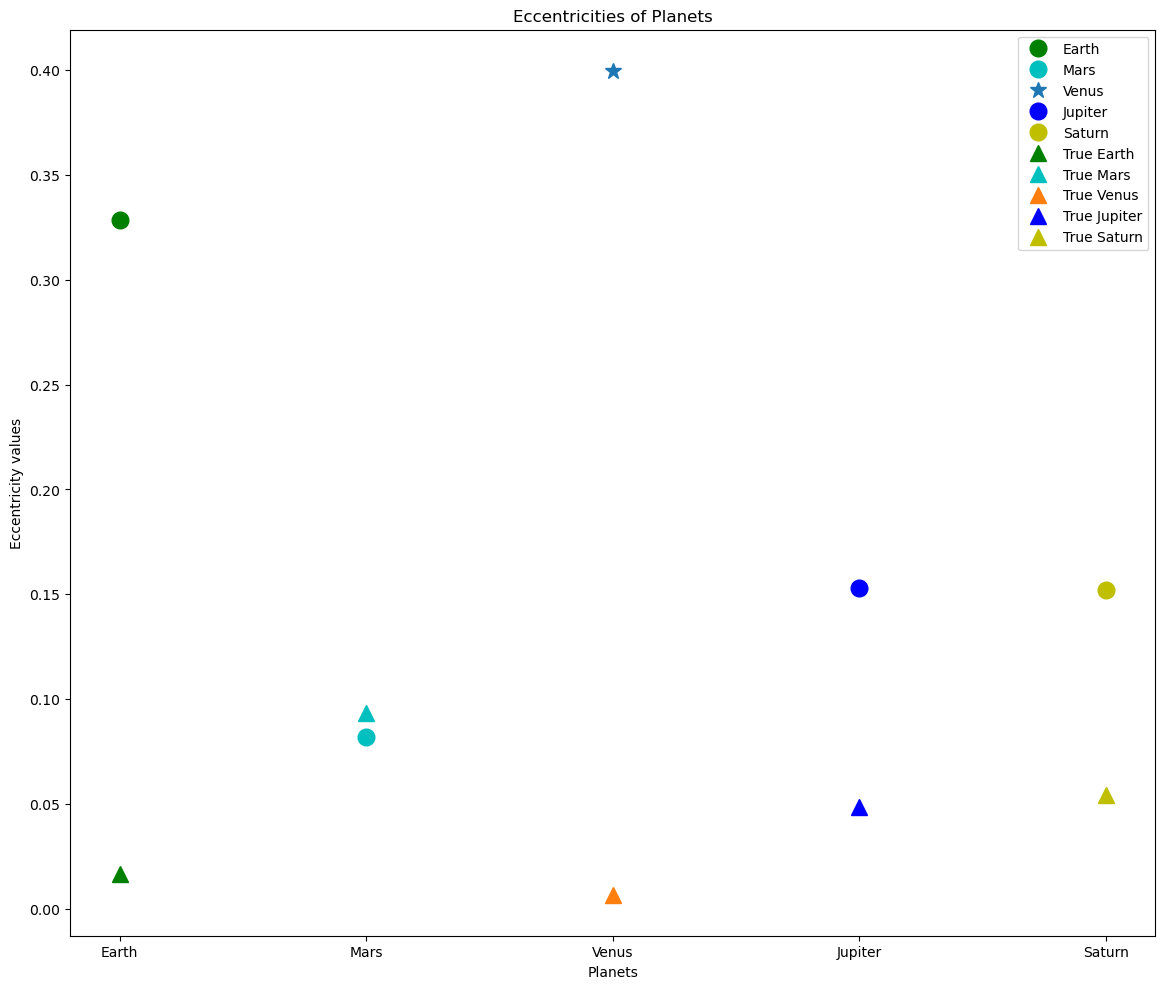

In [55]:
figure(figsize=(14, 12), dpi=100)
real_ecc = [.0167, .0934, .0068, 0.0484, .0541]
ecc = ["Earth", "Mars", "Venus", "Jupiter", "Saturn"]
plt.plot(ecc[0], Earth_ecc,'go', markersize=12,label = 'Earth')
plt.plot(ecc[1], Mars_ecc, 'co', markersize=12,label = 'Mars')
plt.plot(ecc[2], Venus_ecc, '*', markersize=12,label = 'Venus')
plt.plot(ecc[3], Jupiter_ecc, 'bo', markersize=12, label = 'Jupiter')
plt.plot(ecc[4], Saturn_ecc, 'yo', markersize=12,label = "Saturn")

plt.plot(ecc[0], real_ecc[0],'g^', markersize=12, label = 'True Earth')
plt.plot(ecc[1], real_ecc[1], 'c^', markersize=12, label = 'True Mars')
plt.plot(ecc[2], real_ecc[2], '^', markersize=12, label = 'True Venus')
plt.plot(ecc[3], real_ecc[3], 'b^', markersize=12, label = 'True Jupiter')
plt.plot(ecc[4], real_ecc[4], 'y^', markersize=12, label = 'True Saturn')

plt.title("Eccentricities of Planets")
plt.ylabel('Eccentricity values')
plt.xlabel("Planets")
plt.legend()
plt.show()